In [46]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D


In [47]:
#Generate some random data for observations
observations = 2352
xs = np.random.uniform(low=-10, high=10, size=(observations, 1))
zs = np.random.uniform(low=-10, high=10, size=(observations, 1))
#Generate some noise
noise = np.random.uniform(low=-1, high=1, size=(observations, 1))
inputs = np.column_stack((xs, zs))
print (inputs.shape)

(2352, 2)


In [48]:
#Generate the targets
targets = 154.45*xs - 73.39*zs - 15.36 + noise
#Check the shape of the targets just in case. It should be n x m, where m is the number of output variables
print (targets.shape)

(2352, 1)


In [ ]:
#Plot the training data
targets = targets.reshape(observations,)
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(xs, zs, targets)
ax.set_xlabel('Xs')
ax.set_ylabel('Zs')
ax.set_zlabel('Targets')
ax.azim = 45  # You can change this value to view the plot from different angles
plt.show()
targets = targets.reshape(observations, 1)  # Ensure targets is a 2D array


In [ ]:
#initialize weights and bias
init_range = 0.1
weights = np.random.uniform(low=-init_range, high=init_range, size=(2, 1))
bias = np.random.uniform(low=-init_range, high=init_range, size=1)
# Set some small learning rate (denoted eta)
learning_rate = 0.01
print(weights)
print(bias)

[[-0.09183587]
 [-0.06790159]]
[-0.02514868]


In [ ]:
#Train the model
for i in range(100):
    # Calculate outputs
    outputs = np.dot(inputs, weights) + bias

    # Calculate deltas
    deltas = outputs - targets
   
 #Calculate L2-norm Loss
def calc_loss(outputs, targets):
    deltas = outputs - targets
    loss = np.sum(deltas ** 2) / 2 / observations
    print (loss)
deltas_scaled = deltas / observations
weights = weights - learning_rate * np.dot(inputs.T,deltas_scaled)
biases = bias - learning_rate * np.sum(deltas_scaled)

    
    
if i % 100 == 0:
    print(f"Iteration {i}, Loss: {loss:.4f}")

In [ ]:
print (weights, bias)

[[ 52.10241352]
 [-23.11520212]] [-0.02514868]


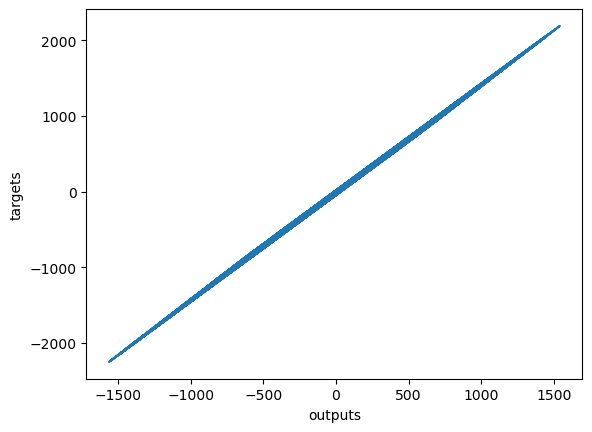

In [ ]:
plt.plot(outputs,targets)
plt.xlabel('outputs')
plt.ylabel('targets')
plt.show()